## Analysis of potential new coffee shop location in Florida:
### Summary
### The Business Problem
There are many reasons for a business failing to turn a profit such as the control of business owners.
The business location is an area of concern that a business has a lot of control over, because the location of a business in the service industry has such a strong impact on whether that business succeeds or fails.
This means that it is an area that demands research and analysis.
A particularly difficult area of business is the restaurant and grocery industry because it is oversaturated and highly competitive which results in new business owners hoping to open a restaurant or shop in an already saturated market.
They should intent on finding a location that gives them the best possible chance for success.

### Audience
The targeted audience for this project is business people or future investors who plan to start a new coffee shop store business, which they will be specifically looking to locate it in the Florida city area.
The research may also be of interest to business owners looking to expand their coffee shops stores in the Florida city area.

### Data Sources
•	Mapbox API will be used to get geographical latitude and longitude coordinates.

•	Geographical location data will be scraped from https://en.wikipedia.org

•	Foursquare will be used to gather information on venues in the locations that will be researched. The API returns a JSON list of venues that contains coordinate city, state, country, locations, category.

### Proposed solution
This project will analyze the postal code areas of Florida, USA. The data from Foursquare will be used to cluster the areas into groups based on the number of specific amenities in the local areas. 
Data about the given areas will be collected using the Foursquare API and geographical information will be retrieved from the web using the Python library BeautifulSoup as well as the mapbox API.
This data will also be used to make recommendations to business owners about the location of optimal area for setting up a new business.

### Foursquare sample 
In this project we will be using the latitude and longitude coordinates of coffee shops across Florida city in order to get an idea of how saturated the coffee shop market is within each postal code. 
Then we can use this information to look at areas of lower saturation as possible locations for a new business.



In [2]:
#Import libraries and dependencies

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

#Beutiful soup for scraping website data
from bs4 import BeautifulSoup as bfs


print("libraries and dependencies imported")

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.0.1               |             py_0         575 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                       

## Scrape location data from Wikipedia

In [3]:
from urllib.request import urlopen
#Scrape neighbourhood data from wikipedia
page = 'https://en.wikipedia.org/wiki/List_of_Florida_area_codes'

page = urlopen(page).read()
soup = bfs(page)
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of Florida area codes - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"Xm5aRQpAMF0AAKfxytIAAABU","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_Florida_area_codes","wgTitle":"List of Florida area codes","wgCurRevisionId":945634182,"wgRevisionId":945634182,"wgArticleId":4531307,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short descrip

In [4]:
anchor = soup.find('span',{'id':'List_of_area_codes'})
                  
#extract area codes nad area names from the list
area_codes_and_areas = []
ul = anchor.find_next('ul')

for item in ul.findAll('li'):
    for tag in item.findAll('a'):
        area_codes_and_areas.append(tag.text.strip())


#extract area codes
area_codes = []

for item in area_codes_and_areas:
    for num in range(0,9):
        if str(num) in item and item not in area_codes:
            #Exclude areas that overlay other areas
            if item != "448" and item != "561" and item != "352" and item != "786" and item != "321":
                area_codes.append(item)




#extract area names of area codes
area_names = [
    area_codes_and_areas[1:9],
    area_codes_and_areas[10:12],
    #area_codes_and_areas[10:12],
    #area_codes_and_areas[14:17],
    area_codes_and_areas[19:23],
    area_codes_and_areas[24:29],
    #area_codes_and_areas[30:34],
    area_codes_and_areas[42:45],
    #area_codes_and_areas[46:52],
    #area_codes_and_areas[53:57],
    area_codes_and_areas[58:63],
    area_codes_and_areas[64:68],
    area_codes_and_areas[70:75],
    area_codes_and_areas[80:86],
    area_codes_and_areas[87:90],
    area_codes_and_areas[91:98],
    area_codes_and_areas[99:103],
    area_codes_and_areas[104:111],
    area_codes_and_areas[113:116]
]

print("Area codes:",area_codes)
print("Area names:",area_names)

    

#check we have listed the correct number of areas and area codes
print("Areas: ",len(area_names))
print("Area codes: ",len(area_codes))

Area codes: ['239', '305', '407', '689', '386', '727', '754', '954', '772', '813', '850', '863', '904', '941']
Area names: [['Lee County', 'Collier County', 'Monroe County', 'Florida Keys', 'Cape Coral', 'Fort Myers', 'Naples', 'Everglades City'], ['Miami-Dade County', 'Florida Keys'], ['Space Coast', 'Cape Canaveral', 'Melbourne', 'Titusville'], ['Gainesville', 'Ocala', 'Inverness', 'Spring Hill', 'Dunnellon'], ['Pensacola', 'Tallahassee', 'Panama City'], ['Pinellas County', 'Clearwater', 'St. Petersburg', 'Oldsmar', 'Pasco County'], ['Broward County', 'Fort Lauderdale', 'Hollywood', 'Coral Springs'], ['Vero Beach', 'Port Saint Lucie', 'Fort Pierce', 'Sebastian', 'Stuart'], ['Hillsborough County', 'Tampa', 'Plant City', 'Pasco County', 'Oldsmar', 'Pinellas County'], ['Pensacola', 'Tallahassee', 'Panama City'], ['Lakeland', 'Arcadia', 'Avon Park', 'Clewiston', 'Bartow', 'Sebring', 'Winter Haven'], ['Jacksonville', 'St. Augustine', 'Starke', 'Green Cove Springs'], ['Tampa Bay', 'Manatee

## Create a dataframe of our scraped geographical info

In [5]:
d = {'Area codes':area_codes,'Place names':area_names}
df = pd.DataFrame(d)
df

,Area codes,Place names
0,239,"[Lee County, Collier County, Monroe County, Fl..."
1,305,"[Miami-Dade County, Florida Keys]"
2,407,"[Space Coast, Cape Canaveral, Melbourne, Titus..."
3,689,"[Gainesville, Ocala, Inverness, Spring Hill, D..."
4,386,"[Pensacola, Tallahassee, Panama City]"
5,727,"[Pinellas County, Clearwater, St. Petersburg, ..."
6,754,"[Broward County, Fort Lauderdale, Hollywood, C..."
7,954,"[Vero Beach, Port Saint Lucie, Fort Pierce, Se..."
8,772,"[Hillsborough County, Tampa, Plant City, Pasco..."
9,813,"[Pensacola, Tallahassee, Panama City]"


## Use the Mapquest API to get latitude and longitude coordinates of each area code

In [6]:
#mapquest api key
api_key = "1rqEGEqhvNzD44iB3LEEJiEZGwQyZuf3"

In [7]:
coordinates = []

def get_coords():
    for area in area_codes:
            area_code = area
            url = "https://www.mapquestapi.com/geocoding/v1/address?key="+api_key+"&location=FL,"+area_code+", united states"
            coords = requests.get(url).json()["results"][0]["locations"][0]["latLng"]
            lat=coords["lat"]
            lon=coords["lng"]
            coordinates.append([area_code, lat, lon])
    print(coordinates)


get_coords()

[['239', 28.94703, -81.2995], ['305', 28.58214, -81.75084], ['407', 27.71523, -82.43498], ['689', 29.74793, -84.85735], ['386', 30.70996, -86.7611], ['727', 26.13284, -80.13786], ['754', 27.01878, -82.17136], ['954', 29.95433, -82.10759], ['772', 30.18817, -82.615], ['813', 26.13401, -80.1379], ['850', 26.13323, -80.202], ['863', 28.9347, -81.93329], ['904', 29.60769, -82.81801], ['941', 26.13502, -80.20311]]


In [8]:
coords_df = pd.DataFrame(coordinates)
coords_df.columns = ['Area codes','Latitude', 'Longitude']
coords_df

,Area codes,Latitude,Longitude
0,239,28.94703,-81.29950
1,305,28.58214,-81.75084
2,407,27.71523,-82.43498
3,689,29.74793,-84.85735
4,386,30.70996,-86.76110
5,727,26.13284,-80.13786
6,754,27.01878,-82.17136
7,954,29.95433,-82.10759
8,772,30.18817,-82.61500
9,813,26.13401,-80.13790


## Join the place name dataframe with the coordinates dataframe

In [9]:
#Merge the cleaned_df dataframe with the coords dataframe
merged_df = pd.merge(left=df,right=coords_df, left_on='Area codes', right_on='Area codes')
# take a look at the head of our newnly created dataframe
merged_df

,Area codes,Place names,Latitude,Longitude
0,239,"[Lee County, Collier County, Monroe County, Fl...",28.94703,-81.29950
1,305,"[Miami-Dade County, Florida Keys]",28.58214,-81.75084
2,407,"[Space Coast, Cape Canaveral, Melbourne, Titus...",27.71523,-82.43498
3,689,"[Gainesville, Ocala, Inverness, Spring Hill, D...",29.74793,-84.85735
4,386,"[Pensacola, Tallahassee, Panama City]",30.70996,-86.76110
5,727,"[Pinellas County, Clearwater, St. Petersburg, ...",26.13284,-80.13786
6,754,"[Broward County, Fort Lauderdale, Hollywood, C...",27.01878,-82.17136
7,954,"[Vero Beach, Port Saint Lucie, Fort Pierce, Se...",29.95433,-82.10759
8,772,"[Hillsborough County, Tampa, Plant City, Pasco...",30.18817,-82.61500
9,813,"[Pensacola, Tallahassee, Panama City]",26.13401,-80.13790


In [10]:
florida_lat= 27.6648
florida_lon= -81.5158

# create map of Florida using latitude and longitude values
map_florida = folium.Map(location=[florida_lat, florida_lon], zoom_start=6)

# add markers to map
for lat, lng, area in zip(merged_df['Latitude'], merged_df['Longitude'], merged_df['Area codes']):
    label = 'Florida {}'.format(area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_florida)  
    
map_florida

## Let's get data on each area code using the Foursquare API

In [11]:
CLIENT_ID = 'BSTKQ1Y4YZHF1XKUWU35UE1DJ05VHA11VYUJQBSX5K0OGVI2'
CLIENT_SECRET = 'IZH2XHVEFQBIIUK3DDDCTV0J1ZUNDX4MJAWY5GYLCAPFT342'
VERSION = '20180323'
LIMIT = '100'

## Retrieve JSON formatted data from the Foursquare API

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area code', 
                  'Area Latitude', 
                  'Area Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
#Run the function above to retrieve Foursquare data on the neighbourhoods 
florida_venues = getNearbyVenues(names=merged_df['Area codes'],
                                   latitudes=merged_df['Latitude'],
                                   longitudes=merged_df['Longitude']
                                  )

239
305
407
689
386
727
754
954
772
813
850
863
904
941


In [14]:
# Check the size of the dataframe
print(florida_venues.shape)
florida_venues.head()

(344, 7)


,Area code,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,239,28.94703,-81.2995,Family Fun Town,28.944981,-81.299982,General Entertainment
1,239,28.94703,-81.2995,Daly's Irish Bar and Store,28.954819,-81.299170,Bar
2,239,28.94703,-81.2995,Cumberland Farms,28.939915,-81.300702,Convenience Store
3,239,28.94703,-81.2995,Enterprise Rent-A-Car,28.941361,-81.298541,Rental Car Location
4,239,28.94703,-81.2995,Dollar General,28.955407,-81.298583,Discount Store


In [15]:
#Show number of venues per area code
counts = florida_venues.groupby('Area code').count()
counts

,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Area code,,,,,,
239,13,13,13,13,13,13
305,21,21,21,21,21,21
386,3,3,3,3,3,3
407,12,12,12,12,12,12
689,1,1,1,1,1,1
727,78,78,78,78,78,78
754,5,5,5,5,5,5
772,5,5,5,5,5,5
813,88,88,88,88,88,88


In [16]:
#Calculate number of unique venues 
print('There are {} uniques categories.'.format(len(florida_venues['Venue Category'].unique())))

There are 105 uniques categories.


## Let's vizualize that as a bar chart

In [17]:
venue_count = []
area_code_indx = []
indexed_counts = counts.index

i=0
for count in counts['Venue Category']:
    venue_count.append(counts['Venue Category'][i])
    area_code_indx.append(indexed_counts[i])
    i+= 1
    

print(area_code_indx)
print(venue_count)

['239', '305', '386', '407', '689', '727', '754', '772', '813', '850', '863', '904', '941', '954']
[13, 21, 3, 12, 1, 78, 5, 5, 88, 15, 58, 9, 20, 16]


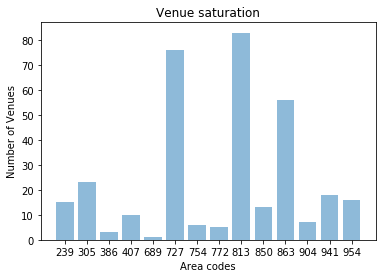

In [32]:
import matplotlib.pyplot as plt
y_pos = np.arange(len(area_code_indx))

plt.bar(y_pos, venue_count, align='center', alpha=0.5)
plt.xticks(y_pos, area_code_indx)
plt.ylabel('Number of Venues')
plt.xlabel('Area codes')
plt.title('Venue saturation')

plt.show()

## Exploring Florida 863

In [18]:
#Get area names for Florida 863
D13_names = area_names[8]
print(D13_names)

['Hillsborough County', 'Tampa', 'Plant City', 'Pasco County', 'Oldsmar', 'Pinellas County']


In [19]:
#Get the coordinates of each area in Florida 863
area_coordinates = []

def get_area_coords():
    for area in area_names[8]:
            area_name = area
            url = "https://www.mapquestapi.com/geocoding/v1/address?key="+api_key+"&location=FL,"+area_name+", united states"
            coords = requests.get(url).json()["results"][0]["locations"][0]["latLng"]
            lat=coords["lat"]
            lon=coords["lng"]
            area_coordinates.append([area_name, lat, lon])
    print(area_coordinates)

get_area_coords()

[['Hillsborough County', 27.947423, -82.458776], ['Tampa', 27.947423, -82.458776], ['Plant City', 27.998304, -82.12042], ['Pasco County', 28.250201, -82.714075], ['Oldsmar', 28.037962, -82.664254], ['Pinellas County', 27.963991, -82.799957]]


In [20]:
fl_df = pd.DataFrame(area_coordinates)
fl_df.columns = ['Area name', 'Latitude', 'Longitude']
fl_df

,Area name,Latitude,Longitude
0,Hillsborough County,27.947423,-82.458776
1,Tampa,27.947423,-82.458776
2,Plant City,27.998304,-82.120420
3,Pasco County,28.250201,-82.714075
4,Oldsmar,28.037962,-82.664254
5,Pinellas County,27.963991,-82.799957


## Let's vizualize these areas on a map

In [21]:
florida_lat= 27.6648
florida_lon= -81.5158

# create map of Florida using latitude and longitude values
map_fl_863 = folium.Map(location=[florida_lat, florida_lon], zoom_start=7)

# add markers to map
for lat, lng, area in zip(fl_df['Latitude'], fl_df['Longitude'], fl_df['Area name']):
    label = 'Florida 863 {}'.format(area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_fl_863)  
    
map_fl_863

In [53]:
#Run the getNearbyVenues function with our new values to retrieve Foursquare data on the neighbourhoods 
fl_venues = getNearbyVenues(names=fl_df['Area name'],
                                   latitudes=fl_df['Latitude'],
                                   longitudes=fl_df['Longitude']
                                  )

Hillsborough County
Tampa
Plant City
Pasco County
Oldsmar
Pinellas County


In [55]:
# Check the size of the dataframe
print(fl_venues.shape)
fl_venues.head()

(318, 7)


,Area code,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hillsborough County,27.947423,-82.458776,Tampa Riverwalk,27.947131,-82.460898,Scenic Lookout
1,Hillsborough County,27.947423,-82.458776,Eddie and Sam's Pizza,27.949044,-82.459184,Pizza Place
2,Hillsborough County,27.947423,-82.458776,SoFresh,27.949004,-82.458581,Restaurant
3,Hillsborough County,27.947423,-82.458776,Bamboozle Cafe,27.948543,-82.459354,Vietnamese Restaurant
4,Hillsborough County,27.947423,-82.458776,First Watch - Downtown Tampa,27.948712,-82.459507,Breakfast Spot


In [56]:
#Show number of venues per area code
fl_venue_counts = fl_venues.groupby('Area code').count()


#Calculate number of unique venues 
print('There are {} uniques categories.'.format(len(fl_venues['Venue Category'].unique())))

fl_venue_counts

There are 101 uniques categories.


,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Area code,,,,,,
Hillsborough County,100,100,100,100,100,100
Oldsmar,32,32,32,32,32,32
Pasco County,29,29,29,29,29,29
Pinellas County,48,48,48,48,48,48
Plant City,9,9,9,9,9,9
Tampa,100,100,100,100,100,100


## Let's visualize that with a barchart

In [58]:
fl_venue_count = []
area_indx = []
fl_indexed_counts = fl_venue_counts.index

i=0
for count in fl_venue_counts['Venue Category']:
    fl_venue_count.append(fl_venue_counts['Venue Category'][i])
    area_indx.append(fl_indexed_counts[i])
    i+= 1
    

print(area_indx)
print(fl_venue_count)

['Hillsborough County', 'Oldsmar', 'Pasco County', 'Pinellas County', 'Plant City', 'Tampa']
[100, 32, 29, 48, 9, 100]


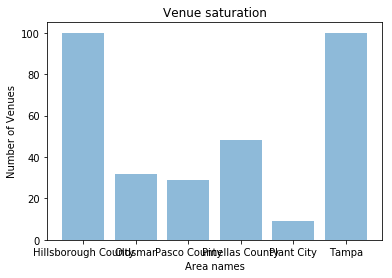

In [59]:
y_pos = np.arange(len(area_indx))

plt.bar(y_pos, fl_venue_count, align='center', alpha=0.5)
plt.xticks(y_pos, area_indx)
plt.ylabel('Number of Venues')
plt.xlabel('Area names')
plt.title('Venue saturation')

plt.show()

## Analyze each place name

In [60]:
# one hot encoding
fl_onehot = pd.get_dummies(fl_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
fl_onehot['Area name'] = fl_venues['Area code'] 

# move neighborhood column to the first column
fixed_columns = [fl_onehot.columns[-1]] + list(fl_onehot.columns[:-1])
fl_onehot = fl_onehot[fixed_columns]

fl_onehot.head()

,Area name,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bank,Bar,Basketball Court,Beer Garden,Breakfast Spot,Brewery,Business Service,Café,Caribbean Restaurant,Chinese Restaurant,Church,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Deli / Bodega,Diner,Dive Bar,Dog Run,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Food Service,Gastropub,Gay Bar,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Hockey Arena,Hockey Field,Home Service,Hookah Bar,Hotel,Hotel Pool,Ice Cream Shop,Irish Pub,Italian Restaurant,Japanese Restaurant,Lake,Light Rail Station,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Movie Theater,Museum,Music Venue,Nightclub,Optical Shop,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Pub,Rental Car Location,Restaurant,Sandwich Place,Scenic Lookout,School,Shipping Store,Skate Park,Smoke Shop,Spa,Spanish Restaurant,Speakeasy,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Video Store,Vietnamese Restaurant,Yoga Studio
0,Hillsborough County,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Hillsborough County,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hillsborough County,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Hillsborough County,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Hillsborough County,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Group rows by Area name and by taking the mean of the frequency of occurrence of each category

In [61]:
fl_grouped = fl_onehot.groupby('Area name').mean().reset_index()
fl_grouped

,Area name,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bank,Bar,Basketball Court,Beer Garden,Breakfast Spot,Brewery,Business Service,Café,Caribbean Restaurant,Chinese Restaurant,Church,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Deli / Bodega,Diner,Dive Bar,Dog Run,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Food Service,Gastropub,Gay Bar,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Hockey Arena,Hockey Field,Home Service,Hookah Bar,Hotel,Hotel Pool,Ice Cream Shop,Irish Pub,Italian Restaurant,Japanese Restaurant,Lake,Light Rail Station,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Movie Theater,Museum,Music Venue,Nightclub,Optical Shop,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Pub,Rental Car Location,Restaurant,Sandwich Place,Scenic Lookout,School,Shipping Store,Skate Park,Smoke Shop,Spa,Spanish Restaurant,Speakeasy,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Video Store,Vietnamese Restaurant,Yoga Studio
0,Hillsborough County,0.050000,0.010000,0.01,0.02,0.01,0.01000,0.02,0.000000,0.040000,0.00000,0.01,0.010000,0.000000,0.000000,0.0200,0.010000,0.00000,0.000000,0.020000,0.060000,0.01,0.01,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.01,0.000000,0.01,0.000000,0.010000,0.01,0.01,0.01,0.000000,0.01,0.010000,0.01,0.010000,0.01,0.02,0.01,0.01,0.000000,0.050000,0.00000,0.02000,0.010000,0.000000,0.000000,0.000000,0.00000,0.010000,0.01,0.02,0.010000,0.000000,0.00000,0.01,0.02,0.000000,0.01,0.01,0.040000,0.01,0.00000,0.010000,0.030000,0.00000,0.000000,0.01,0.010000,0.020000,0.000000,0.01,0.01,0.010000,0.01,0.000000,0.000000,0.02,0.01,0.04,0.010000,0.000000,0.00000,0.00000,0.01,0.01,0.01,0.000000,0.040000,0.00000,0.000000,0.01,0.000000,0.01,0.000000
1,Oldsmar,0.062500,0.000000,0.00,0.00,0.00,0.03125,0.00,0.031250,0.000000,0.03125,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.03125,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.031250,0.000000,0.031250,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.031250,0.00,0.031250,0.00,0.00,0.00,0.00,0.000000,0.125000,0.03125,0.03125,0.000000,0.000000,0.000000,0.000000,0.03125,0.031250,0.00,0.00,0.031250,0.000000,0.03125,0.00,0.00,0.000000,0.00,0.00,0.093750,0.00,0.03125,0.000000,0.031250,0.03125,0.000000,0.00,0.000000,0.000000,0.062500,0.00,0.00,0.031250,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.03125,0.03125,0.00,0.00,0.00,0.000000,0.000000,0.03125,0.000000,0.00,0.000000,0.00,0.000000
2,Pasco County,0.103448,0.034483,0.00,0.00,0.00,0.00000,0.00,0.000000,0.034483,0.00000,0.00,0.137931,0.034483,0.068966,0.0000,0.000000,0.00000,0.000000,0.034483,0.000000,0.00,0.00,0.034483,0.000000,0.034483,0.000000,0.000000,0.000000,0.034483,0.00,0.000000,0.00,0.034483,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00000,0.00000,0.034483,0.034483,0.000000,0.034483,0.00000,0.034483,0.00,0.00,0.034483,0.000000,0.00000,0.00,0.00,0.000000,0.00,0.00,0.068966,0.00,0.00000,0.000000,0.000000,0.00000,0.034483,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.034483,0.034483,0.00,0.00,0.00,0.034483,0.000000,0.00000,0.00000,0.00,0.00,0.00,0.000000,0.034483,0.00000,0.000000,0.00,0.000000,0.00,0.000000
3,Pinellas County,0.020833,0.000000,0.00,0.00,0.00,0.00000,0.00,0.020833,0.000000,0.00000,0.00,0.020833,0.000000,0.000000,0.0625,0.020833,0.00000,0.020833,0.000000,0.020833,0.00,0.00,0.000000,0.020833,0.020833,0.041667,0.041667,0.020833,0.000000,0.00,0.020833,0.00,0.020833,0.000000,0.00,0.00,0.00,0.020833,0.00,0.020833,0.00,0.020833,0.00,0.00,0.00,0.00,0.020833,0.041667,0.0

In [63]:
len(fl_grouped[fl_grouped["Café"] > 0])

3

In [65]:
fl_café = fl_grouped[["Area name","Café"]]
fl_café

,Area name,Café
0,Hillsborough County,0.0200
1,Oldsmar,0.0000
2,Pasco County,0.0000
3,Pinellas County,0.0625
4,Plant City,0.0000
5,Tampa,0.0200


## Cluster Areas
### Run k-means to cluster the areas into 3 clusters

In [66]:
# set number of clusters
kclusters = 3

fl_café_clustering = fl_café.drop('Area name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(fl_café_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 1, 2, 1, 0], dtype=int32)

In [67]:
fl_merged = fl_café

# add clustering labels
fl_merged['Cluster Labels'] = kmeans.labels_


fl_merged.rename(columns={"Area name": "Area name"}, inplace=True)
fl_merged

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Area name,Café,Cluster Labels
0,Hillsborough County,0.0200,0
1,Oldsmar,0.0000,1
2,Pasco County,0.0000,1
3,Pinellas County,0.0625,2
4,Plant City,0.0000,1
5,Tampa,0.0200,0


## Look at individual clusters

In [68]:
fl_merged.loc[fl_merged['Cluster Labels'] == 0]

,Area name,Café,Cluster Labels
0,Hillsborough County,0.02,0
5,Tampa,0.02,0


In [69]:
fl_merged.loc[fl_merged['Cluster Labels'] == 1]

,Area name,Café,Cluster Labels
1,Oldsmar,0.0,1
2,Pasco County,0.0,1
4,Plant City,0.0,1


In [70]:
fl_merged.loc[fl_merged['Cluster Labels'] == 2]

,Area name,Café,Cluster Labels
3,Pinellas County,0.0625,2


## Results

The results of our k-means clustering showed that the first cluster (cluster 0) had a low to moderate number of Grocery stores.
The second cluster (cluster 1) had the lowest percentage of coffee shops in the clustered areas.
The third cluster (cluster 2) had the highest concentration of coffee shops.
Regarding these measurements it would be advantageous to open a new coffee shop in the Pinellas County that belong to cluster 2.

## Further research

While this project looked at potential areas for opening a Cafe store based on preexisting Cafes there are many other data sets that should be investigated in order to create a more thorough report. Some of these data may include demographics, affluence, population density, spending trends, and crime rates to name a few.

This project will continue to grow as it integrates more of the above mentioned data sets.